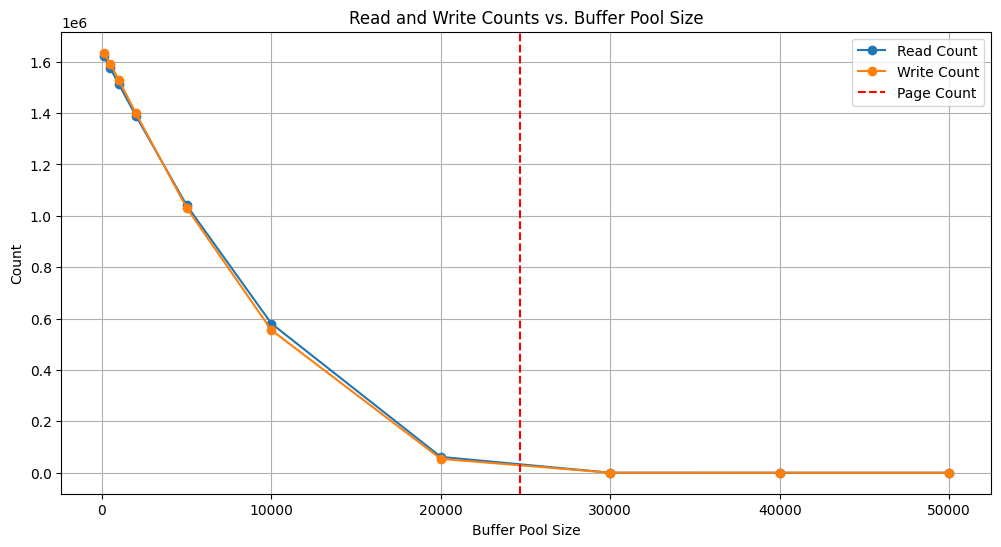

In [8]:
# Import necessary libraries
import subprocess
import re
import matplotlib.pyplot as plt
import csv
import os

# Define a function to run the binary and extract the I/O counts
def run_binary(buffer_pool_size):
    command = f'../target/release/hi_on_disk -u -b {buffer_pool_size}'
    process = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    stdout, stderr = process.communicate()
    
    if stderr:
        print(f"Error: {stderr.decode()}")
        return None, None
    
    stdout = stdout.decode()
    read_count = None
    write_count = None
    page_count = None
    
    for line in stdout.split('\n'):
        if 'New Page' in line:
            page_count = int(re.search(r'\d+', line).group())
        if 'Read Count' in line:
            read_count = int(re.search(r'\d+', line).group())
        if 'Write Count' in line:
            write_count = int(re.search(r'\d+', line).group())
            break
    
    return page_count, read_count, write_count

# Define buffer pool sizes to test
buffer_pool_sizes = [100, 500, 1000, 2000, 5000, 10000, 20000, 30000, 40000, 50000]

# CSV file to store results
csv_file = 'phm_io_insert_counts.csv'

# Check if the file exists
if os.path.exists(csv_file):
    # Read data from the file
    results = []
    with open(csv_file, mode='r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header row
        for row in reader:
            buffer_pool_size, page_count, read_count, write_count = map(int, row)
            results.append([buffer_pool_size, page_count, read_count, write_count])
else:
    # Initialize lists to store the results
    results = []

    # Run the binary for each buffer pool size and store the results
    for size in buffer_pool_sizes:
        page_count, read_count, write_count = run_binary(size)
        results.append([size, page_count, read_count, write_count])
        print(f"Buffer Pool Size: {size}, Page Created: {page_count}, Read Count: {read_count}, Write Count: {write_count}")

    # Write the results to a CSV file
    with open(csv_file, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Buffer Pool Size', 'Page Created', 'Read Count', 'Write Count'])
        writer.writerows(results)

# Extract data for plotting
buffer_pool_sizes = [result[0] for result in results]
page_counts = [result[1] for result in results]
read_counts = [result[2] for result in results]
write_counts = [result[3] for result in results]

# Print the average Page Created as a strait line 
# parallel to the y-axis
page_count_avg = sum(page_counts) / len(page_counts)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(buffer_pool_sizes, read_counts, label='Read Count', marker='o')
plt.plot(buffer_pool_sizes, write_counts, label='Write Count', marker='o')
plt.axvline(x=page_count_avg, color='r', linestyle='--', label='Page Created')
plt.xlabel('Buffer Pool Size')
plt.ylabel('IO Count')
plt.title('Read and Write Counts vs. Buffer Pool Size')
plt.legend()
plt.grid(True)
plt.show()

plt.savefig('phm_io_insert_counts.png')


Buffer Pool Size: 100, Page Created: 0, Read Count: 1646700, Write Count: 1138390
Buffer Pool Size: 500, Page Created: 0, Read Count: 1611785, Write Count: 1125065
Buffer Pool Size: 1000, Page Created: 0, Read Count: 1567284, Write Count: 1097076
Buffer Pool Size: 2000, Page Created: 0, Read Count: 1479785, Write Count: 1038882
Buffer Pool Size: 5000, Page Created: 0, Read Count: 1220403, Write Count: 861308
Buffer Pool Size: 10000, Page Created: 0, Read Count: 810036, Write Count: 563115
Buffer Pool Size: 20000, Page Created: 0, Read Count: 137442, Write Count: 68292
Buffer Pool Size: 30000, Page Created: 0, Read Count: 8, Write Count: 0
Buffer Pool Size: 40000, Page Created: 0, Read Count: 0, Write Count: 0
Buffer Pool Size: 50000, Page Created: 0, Read Count: 0, Write Count: 0


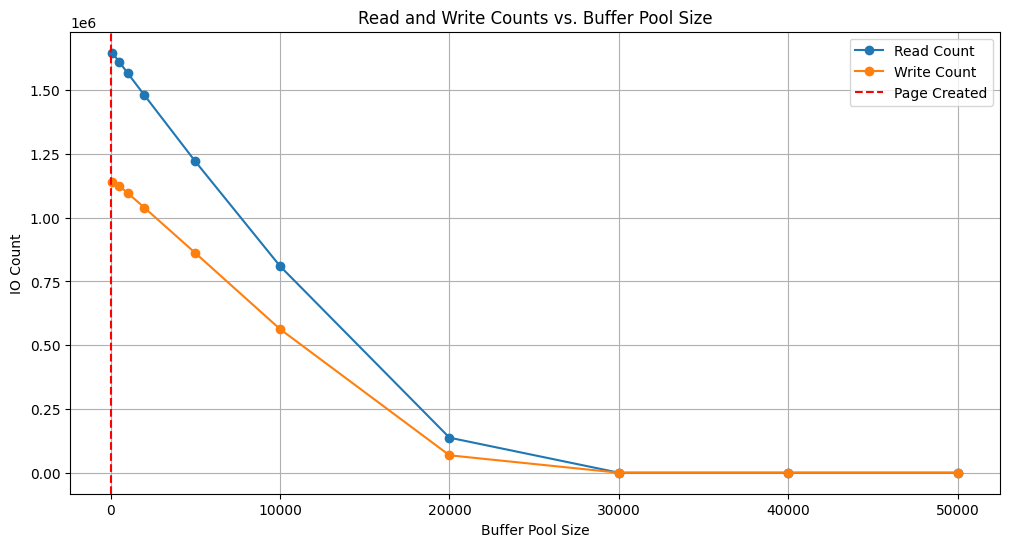

In [9]:
# Import necessary libraries
import subprocess
import re
import matplotlib.pyplot as plt
import csv
import os
# Define a function to run the binary and extract the I/O counts
def run_binary(buffer_pool_size):
    command = f'../target/release/phm_on_disk_get -u -b {buffer_pool_size}'
    process = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    stdout, stderr = process.communicate()
    if stderr:
        print(f"Error: {stderr.decode()}")
        return None, None
    stdout = stdout.decode()
    read_count = None
    write_count = None
    page_count = None
    flag = False
    for line in stdout.split('\n'):
        if 'After Get' in line:
            flag = True
        if flag and 'New Page' in line:
            page_count = int(re.search(r'\d+', line).group())
        if flag and 'Read Count' in line:
            read_count = int(re.search(r'\d+', line).group())
        if flag and 'Write Count' in line:
            write_count = int(re.search(r'\d+', line).group())
            break
    return page_count, read_count, write_count
# Define buffer pool sizes to test
buffer_pool_sizes = [100, 500, 1000, 2000, 5000, 10000, 20000, 30000, 40000, 50000]
# CSV file to store results
csv_file = 'phm_io_get_counts.csv'
# Check if the file exists
if os.path.exists(csv_file):
    # Read data from the file
    results = []
    with open(csv_file, mode='r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header row
        for row in reader:
            buffer_pool_size, page_count, read_count, write_count = map(int, row)
            results.append([buffer_pool_size, page_count, read_count, write_count])
else:
    # Initialize lists to store the results
    results = []
    # Run the binary for each buffer pool size and store the results
    for size in buffer_pool_sizes:
        page_count, read_count, write_count = run_binary(size)
        results.append([size, page_count, read_count, write_count])
        print(f"Buffer Pool Size: {size}, Page Created: {page_count}, Read Count: {read_count}, Write Count: {write_count}")
    # Write the results to a CSV file
    with open(csv_file, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Buffer Pool Size', 'Read Count', 'Write Count'])
        writer.writerows(results)
# Extract data for plotting
buffer_pool_sizes = [result[0] for result in results]
page_counts = [result[1] for result in results]
read_counts = [result[2] for result in results]
write_counts = [result[3] for result in results]
page_count_avg = sum(page_counts) / len(page_counts)
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(buffer_pool_sizes, read_counts, label='Read Count', marker='o')
plt.plot(buffer_pool_sizes, write_counts, label='Write Count', marker='o')
plt.axvline(x=page_count_avg, color='r', linestyle='--', label='Page Created')
plt.xlabel('Buffer Pool Size')
plt.ylabel('IO Count')
plt.title('Read and Write Counts vs. Buffer Pool Size')
plt.legend()
plt.grid(True)
plt.show()

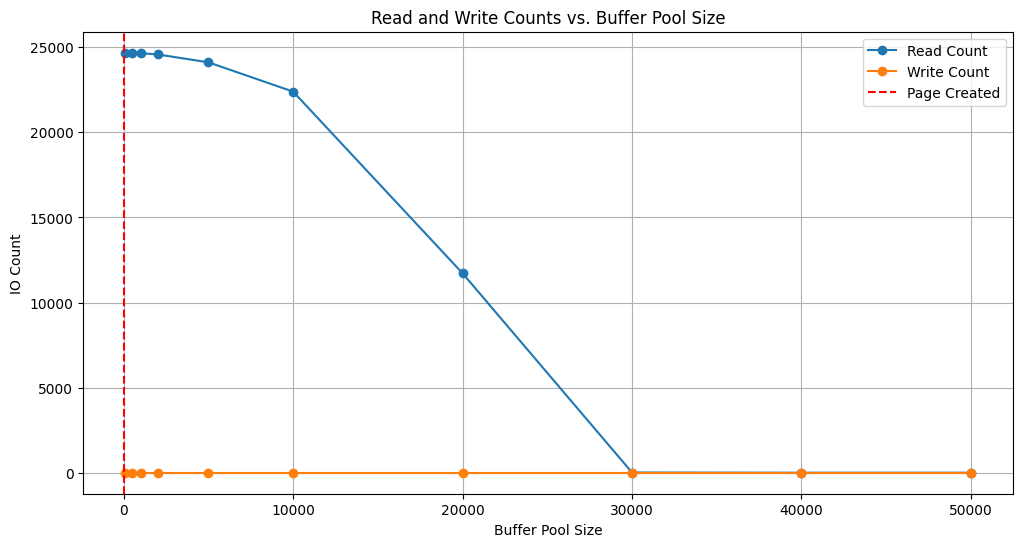

In [1]:
# Import necessary libraries
import subprocess
import re
import matplotlib.pyplot as plt
import csv
import os

# Define a function to run the binary and extract the I/O counts
def run_binary(buffer_pool_size):
    command = f'../target/release/phm_on_disk_scan -u -b {buffer_pool_size}'
    process = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    stdout, stderr = process.communicate()
    
    if stderr:
        print(f"Error: {stderr.decode()}")
        return None, None
    
    stdout = stdout.decode()
    read_count = None
    write_count = None
    page_count = None
    
    flag = False

    for line in stdout.split('\n'):
        if 'After Scan' in line:
            flag = True
        if flag and 'New Page' in line:
            page_count = int(re.search(r'\d+', line).group())
        if flag and 'Read Count' in line:
            read_count = int(re.search(r'\d+', line).group())
        if flag and 'Write Count' in line:
            write_count = int(re.search(r'\d+', line).group())
            break
    
    return page_count, read_count, write_count

# Define buffer pool sizes to test
buffer_pool_sizes = [100, 500, 1000, 2000, 5000, 10000, 20000, 30000, 40000, 50000]

# CSV file to store results
csv_file = 'phm_io_scan_counts.csv'

# Check if the file exists
if os.path.exists(csv_file):
    # Read data from the file
    results = []
    with open(csv_file, mode='r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header row
        for row in reader:
            buffer_pool_size, page_count, read_count, write_count = map(int, row)
            results.append([buffer_pool_size, page_count, read_count, write_count])
else:
    # Initialize lists to store the results
    results = []

    # Run the binary for each buffer pool size and store the results
    for size in buffer_pool_sizes:
        page_count, read_count, write_count = run_binary(size)
        results.append([size, page_count, read_count, write_count])
        print(f"Buffer Pool Size: {size}, Page Created: {page_count}, Read Count: {read_count}, Write Count: {write_count}")

    # Write the results to a CSV file
    with open(csv_file, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Buffer Pool Size', 'Read Count', 'Write Count'])
        writer.writerows(results)

# Extract data for plotting
buffer_pool_sizes = [result[0] for result in results]
page_counts = [result[1] for result in results]
read_counts = [result[2] for result in results]
write_counts = [result[3] for result in results]

page_count_avg = sum(page_counts) / len(page_counts)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(buffer_pool_sizes, read_counts, label='Read Count', marker='o')
plt.plot(buffer_pool_sizes, write_counts, label='Write Count', marker='o')
plt.axvline(x=page_count_avg, color='r', linestyle='--', label='Page Created')
plt.xlabel('Buffer Pool Size')
plt.ylabel('IO Count')
plt.title('Read and Write Counts vs. Buffer Pool Size')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
import subprocess
import re
import matplotlib.pyplot as plt
import csv
import os

# Function to run the binary and extract the I/O counts
def run_binary(buffer_pool_size, thread_count, num_runs=10):
    insert_times_no_ps = []
    insert_times_ps = []
    get_times_no_ps = []
    get_times_ps = []

    for _ in range(num_runs):
        command = f'../target/release/phm_ps_on_off -u -b {buffer_pool_size} -t {thread_count}'
        process = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        stdout, stderr = process.communicate()

        if stderr:
            print(f"Error: {stderr.decode()}")
            return None, None, None, None

        stdout = stdout.decode()
        
        for line in stdout.split('\n'):
            if 'Duration Insert without Pointer Swizzling:' in line:
                match = re.search(r'([\d.]+)(ms|s)', line)
                if match:
                    insert_time_no_ps = float(match.group(1))
                    if match.group(2) == 'ms':
                        insert_time_no_ps /= 1000  # convert ms to s
                    insert_times_no_ps.append(insert_time_no_ps)
            if 'Duration Insert with Pointer Swizzling:' in line:
                match = re.search(r'([\d.]+)(ms|s)', line)
                if match:
                    insert_time_ps = float(match.group(1))
                    if match.group(2) == 'ms':
                        insert_time_ps /= 1000  # convert ms to s
                    insert_times_ps.append(insert_time_ps)
            if 'Duration Get without Pointer Swizzling:' in line:
                match = re.search(r'([\d.]+)(ms|s)', line)
                if match:
                    get_time_no_ps = float(match.group(1))
                    if match.group(2) == 'ms':
                        get_time_no_ps /= 1000  # convert ms to s
                    get_times_no_ps.append(get_time_no_ps)
            if 'Duration Get with Pointer Swizzling:' in line:
                match = re.search(r'([\d.]+)(ms|s)', line)
                if match:
                    get_time_ps = float(match.group(1))
                    if match.group(2) == 'ms':
                        get_time_ps /= 1000  # convert ms to s
                    get_times_ps.append(get_time_ps)

    avg_insert_time_no_ps = sum(insert_times_no_ps) / len(insert_times_no_ps)
    avg_insert_time_ps = sum(insert_times_ps) / len(insert_times_ps)
    avg_get_time_no_ps = sum(get_times_no_ps) / len(get_times_no_ps)
    avg_get_time_ps = sum(get_times_ps) / len(get_times_ps)

    return avg_insert_time_no_ps, avg_insert_time_ps, avg_get_time_no_ps, avg_get_time_ps

# Define buffer pool sizes and thread counts to test
buffer_pool_sizes = [10000, 20000]
thread_counts = [1, 2, 3, 4]

# CSV file to store results
csv_file = 'phm_ps_on_off.csv'

# Check if the file exists
if os.path.exists(csv_file):
    # Read data from the file
    results = []
    with open(csv_file, mode='r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header row
        for row in reader:
            buffer_pool_size, thread_count, insert_time_no_ps, insert_time_ps, get_time_no_ps, get_time_ps = map(float, row)
            # Filter results to include only the specified buffer pool sizes
            if buffer_pool_size in buffer_pool_sizes:
                results.append([buffer_pool_size, thread_count, insert_time_no_ps, insert_time_ps, get_time_no_ps, get_time_ps])
else:
    # Initialize lists to store the results
    results = []

    # Run the binary for each buffer pool size and thread count, and store the results
    for size in buffer_pool_sizes:
        for t_count in thread_counts:
            insert_time_no_ps, insert_time_ps, get_time_no_ps, get_time_ps = run_binary(size, t_count)
            if insert_time_no_ps is not None and insert_time_ps is not None and get_time_no_ps is not None and get_time_ps is not None:
                results.append([size, t_count, insert_time_no_ps, insert_time_ps, get_time_no_ps, get_time_ps])
                print(f"Buffer Pool Size: {size}, Thread Count: {t_count}, Insert Time without PS: {insert_time_no_ps}s, Insert Time with PS: {insert_time_ps}s, Get Time without PS: {get_time_no_ps}s, Get Time with PS: {get_time_ps}s")

    # Write the results to a CSV file
    with open(csv_file, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Buffer Pool Size', 'Thread Count', 'Insert Time without PS', 'Insert Time with PS', 'Get Time without PS', 'Get Time with PS'])
        writer.writerows(results)

# Extract data for plotting
insert_times_no_ps = {bp_size: [] for bp_size in buffer_pool_sizes}
insert_times_ps = {bp_size: [] for bp_size in buffer_pool_sizes}
get_times_no_ps = {bp_size: [] for bp_size in buffer_pool_sizes}
get_times_ps = {bp_size: [] for bp_size in buffer_pool_sizes}

for result in results:
    buffer_pool_size, thread_count, insert_time_no_ps, insert_time_ps, get_time_no_ps, get_time_ps = result
    if buffer_pool_size in buffer_pool_sizes:
        insert_times_no_ps[buffer_pool_size].append((thread_count, insert_time_no_ps))
        insert_times_ps[buffer_pool_size].append((thread_count, insert_time_ps))
        get_times_no_ps[buffer_pool_size].append((thread_count, get_time_no_ps))
        get_times_ps[buffer_pool_size].append((thread_count, get_time_ps))

# Plot the results for Insert Times
plt.figure(figsize=(12, 6))
for bp_size in buffer_pool_sizes:
    if insert_times_no_ps[bp_size]:
        thread_count_no_ps, insert_time_no_ps = zip(*sorted(insert_times_no_ps[bp_size]))
        plt.plot(thread_count_no_ps, insert_time_no_ps, label=f'Insert without PS (BP Size: {bp_size})', linestyle='--', marker='o')
        # Add annotation for the line
        plt.annotate(f'BP Size: {bp_size}', (thread_count_no_ps[-1], insert_time_no_ps[-1]), textcoords="offset points", xytext=(10,-10), ha='center')
    if insert_times_ps[bp_size]:
        thread_count_ps, insert_time_ps = zip(*sorted(insert_times_ps[bp_size]))
        plt.plot(thread_count_ps, insert_time_ps, label=f'Insert with PS (BP Size: {bp_size})', linestyle='-', marker='x')
        # Add annotation for the line
        plt.annotate(f'BP Size: {bp_size}', (thread_count_ps[-1], insert_time_ps[-1]), textcoords="offset points", xytext=(10,-10), ha='center')

plt.xlabel('Thread Count')
plt.ylabel('Time (s)')
plt.title('Insert Times vs. Thread Count for Different Buffer Pool Sizes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the results for Get Times
plt.figure(figsize=(12, 6))
for bp_size in buffer_pool_sizes:
    if get_times_no_ps[bp_size]:
        thread_count_no_ps, get_time_no_ps = zip(*sorted(get_times_no_ps[bp_size]))
        plt.plot(thread_count_no_ps, get_time_no_ps, label=f'Get without PS (BP Size: {bp_size})', linestyle='--', marker='o')
        # Add annotation for the line
        plt.annotate(f'BP Size: {bp_size}', (thread_count_no_ps[-1], get_time_no_ps[-1]), textcoords="offset points", xytext=(10,-10), ha='center')
    if get_times_ps[bp_size]:
        thread_count_ps, get_time_ps = zip(*sorted(get_times_ps[bp_size]))
        plt.plot(thread_count_ps, get_time_ps, label=f'Get with PS (BP Size: {bp_size})', linestyle='-', marker='x')
        # Add annotation for the line
        plt.annotate(f'BP Size: {bp_size}', (thread_count_ps[-1], get_time_ps[-1]), textcoords="offset points", xytext=(10,-10), ha='center')

plt.xlabel('Thread Count')
plt.ylabel('Time (s)')
plt.title('Get Times vs. Thread Count for Different Buffer Pool Sizes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Buffer Pool Size: 10000, Thread Count: 1, Insert Time without PS: 0.6522439911s, Insert Time with PS: 0.7391633745000001s, Get Time without PS: 0.5194303982s, Get Time with PS: 0.4696599514s
Buffer Pool Size: 10000, Thread Count: 2, Insert Time without PS: 0.5243861078000001s, Insert Time with PS: 0.5469294535s, Get Time without PS: 0.3955488026s, Get Time with PS: 0.3615686315s
Buffer Pool Size: 10000, Thread Count: 3, Insert Time without PS: 0.5079229738000001s, Insert Time with PS: 0.6089117208000001s, Get Time without PS: 0.4251652404999999s, Get Time with PS: 0.345232786s
Buffer Pool Size: 10000, Thread Count: 4, Insert Time without PS: 0.44456603699999997s, Insert Time with PS: 0.49845662069999996s, Get Time without PS: 0.3504105394s, Get Time with PS: 0.3171294176s
Buffer Pool Size: 20000, Thread Count: 1, Insert Time without PS: 0.6809970437999999s, Insert Time with PS: 0.7139356903999999s, Get Time without PS: 0.494338504s, Get Time with PS: 0.48590818550000003s
Buffer Pool Si

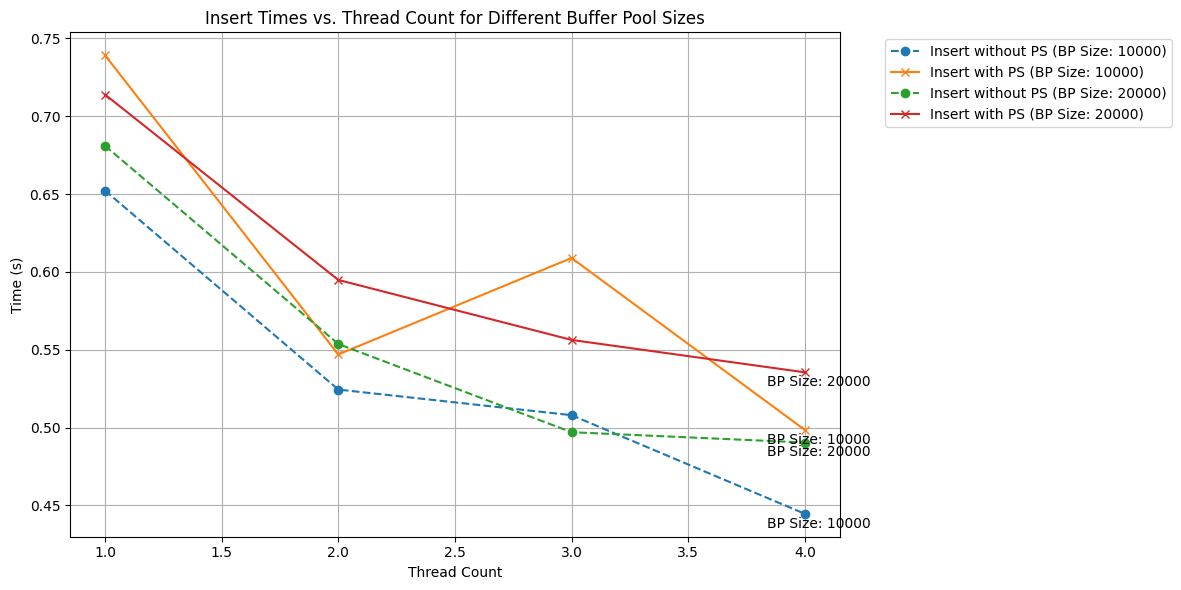

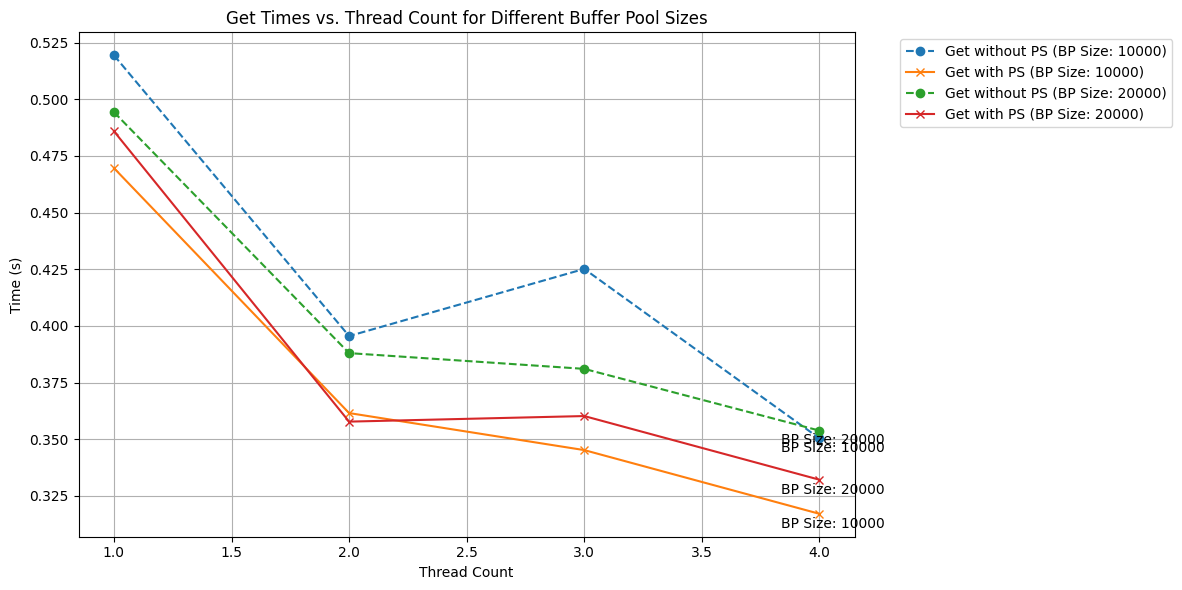

In [7]:
import subprocess
import re
import matplotlib.pyplot as plt
import csv
import os

# Function to run the binary and extract the I/O counts
def run_binary(buffer_pool_size, thread_count, num_runs=10):
    insert_times_no_ps = []
    insert_times_ps = []
    get_times_no_ps = []
    get_times_ps = []

    for _ in range(num_runs):
        command = f'../target/release/phm_ps_skewed_onoff -u -b {buffer_pool_size} -t {thread_count}'
        process = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        stdout, stderr = process.communicate()

        if stderr:
            print(f"Error: {stderr.decode()}")
            return None, None, None, None

        stdout = stdout.decode()
        
        for line in stdout.split('\n'):
            if 'Duration Insert without Pointer Swizzling:' in line:
                match = re.search(r'([\d.]+)(ms|s)', line)
                if match:
                    insert_time_no_ps = float(match.group(1))
                    if match.group(2) == 'ms':
                        insert_time_no_ps /= 1000  # convert ms to s
                    insert_times_no_ps.append(insert_time_no_ps)
            if 'Duration Insert with Pointer Swizzling:' in line:
                match = re.search(r'([\d.]+)(ms|s)', line)
                if match:
                    insert_time_ps = float(match.group(1))
                    if match.group(2) == 'ms':
                        insert_time_ps /= 1000  # convert ms to s
                    insert_times_ps.append(insert_time_ps)
            if 'Duration Get without Pointer Swizzling:' in line:
                match = re.search(r'([\d.]+)(ms|s)', line)
                if match:
                    get_time_no_ps = float(match.group(1))
                    if match.group(2) == 'ms':
                        get_time_no_ps /= 1000  # convert ms to s
                    get_times_no_ps.append(get_time_no_ps)
            if 'Duration Get with Pointer Swizzling:' in line:
                match = re.search(r'([\d.]+)(ms|s)', line)
                if match:
                    get_time_ps = float(match.group(1))
                    if match.group(2) == 'ms':
                        get_time_ps /= 1000  # convert ms to s
                    get_times_ps.append(get_time_ps)

    avg_insert_time_no_ps = sum(insert_times_no_ps) / len(insert_times_no_ps)
    avg_insert_time_ps = sum(insert_times_ps) / len(insert_times_ps)
    avg_get_time_no_ps = sum(get_times_no_ps) / len(get_times_no_ps)
    avg_get_time_ps = sum(get_times_ps) / len(get_times_ps)

    return avg_insert_time_no_ps, avg_insert_time_ps, avg_get_time_no_ps, avg_get_time_ps

# Define buffer pool sizes and thread counts to test
buffer_pool_sizes = [10000, 20000]
thread_counts = [1, 2, 3, 4]

# CSV file to store results
csv_file = 'phm_ps_skewed_on_off.csv'

# Check if the file exists
if os.path.exists(csv_file):
    # Read data from the file
    results = []
    with open(csv_file, mode='r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header row
        for row in reader:
            buffer_pool_size, thread_count, insert_time_no_ps, insert_time_ps, get_time_no_ps, get_time_ps = map(float, row)
            # Filter results to include only the specified buffer pool sizes
            if buffer_pool_size in buffer_pool_sizes:
                results.append([buffer_pool_size, thread_count, insert_time_no_ps, insert_time_ps, get_time_no_ps, get_time_ps])
else:
    # Initialize lists to store the results
    results = []

    # Run the binary for each buffer pool size and thread count, and store the results
    for size in buffer_pool_sizes:
        for t_count in thread_counts:
            insert_time_no_ps, insert_time_ps, get_time_no_ps, get_time_ps = run_binary(size, t_count)
            if insert_time_no_ps is not None and insert_time_ps is not None and get_time_no_ps is not None and get_time_ps is not None:
                results.append([size, t_count, insert_time_no_ps, insert_time_ps, get_time_no_ps, get_time_ps])
                print(f"Buffer Pool Size: {size}, Thread Count: {t_count}, Insert Time without PS: {insert_time_no_ps}s, Insert Time with PS: {insert_time_ps}s, Get Time without PS: {get_time_no_ps}s, Get Time with PS: {get_time_ps}s")

    # Write the results to a CSV file
    with open(csv_file, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Buffer Pool Size', 'Thread Count', 'Insert Time without PS', 'Insert Time with PS', 'Get Time without PS', 'Get Time with PS'])
        writer.writerows(results)

# Extract data for plotting
insert_times_no_ps = {bp_size: [] for bp_size in buffer_pool_sizes}
insert_times_ps = {bp_size: [] for bp_size in buffer_pool_sizes}
get_times_no_ps = {bp_size: [] for bp_size in buffer_pool_sizes}
get_times_ps = {bp_size: [] for bp_size in buffer_pool_sizes}

for result in results:
    buffer_pool_size, thread_count, insert_time_no_ps, insert_time_ps, get_time_no_ps, get_time_ps = result
    if buffer_pool_size in buffer_pool_sizes:
        insert_times_no_ps[buffer_pool_size].append((thread_count, insert_time_no_ps))
        insert_times_ps[buffer_pool_size].append((thread_count, insert_time_ps))
        get_times_no_ps[buffer_pool_size].append((thread_count, get_time_no_ps))
        get_times_ps[buffer_pool_size].append((thread_count, get_time_ps))

# Plot the results for Insert Times
plt.figure(figsize=(12, 6))
for bp_size in buffer_pool_sizes:
    if insert_times_no_ps[bp_size]:
        thread_count_no_ps, insert_time_no_ps = zip(*sorted(insert_times_no_ps[bp_size]))
        plt.plot(thread_count_no_ps, insert_time_no_ps, label=f'Insert without PS (BP Size: {bp_size})', linestyle='--', marker='o')
        # Add annotation for the line
        plt.annotate(f'BP Size: {bp_size}', (thread_count_no_ps[-1], insert_time_no_ps[-1]), textcoords="offset points", xytext=(10,-10), ha='center')
    if insert_times_ps[bp_size]:
        thread_count_ps, insert_time_ps = zip(*sorted(insert_times_ps[bp_size]))
        plt.plot(thread_count_ps, insert_time_ps, label=f'Insert with PS (BP Size: {bp_size})', linestyle='-', marker='x')
        # Add annotation for the line
        plt.annotate(f'BP Size: {bp_size}', (thread_count_ps[-1], insert_time_ps[-1]), textcoords="offset points", xytext=(10,-10), ha='center')

plt.xlabel('Thread Count')
plt.ylabel('Time (s)')
plt.title('Insert Times vs. Thread Count for Different Buffer Pool Sizes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the results for Get Times
plt.figure(figsize=(12, 6))
for bp_size in buffer_pool_sizes:
    if get_times_no_ps[bp_size]:
        thread_count_no_ps, get_time_no_ps = zip(*sorted(get_times_no_ps[bp_size]))
        plt.plot(thread_count_no_ps, get_time_no_ps, label=f'Get without PS (BP Size: {bp_size})', linestyle='--', marker='o')
        # Add annotation for the line
        plt.annotate(f'BP Size: {bp_size}', (thread_count_no_ps[-1], get_time_no_ps[-1]), textcoords="offset points", xytext=(10,-10), ha='center')
    if get_times_ps[bp_size]:
        thread_count_ps, get_time_ps = zip(*sorted(get_times_ps[bp_size]))
        plt.plot(thread_count_ps, get_time_ps, label=f'Get with PS (BP Size: {bp_size})', linestyle='-', marker='x')
        # Add annotation for the line
        plt.annotate(f'BP Size: {bp_size}', (thread_count_ps[-1], get_time_ps[-1]), textcoords="offset points", xytext=(10,-10), ha='center')

plt.xlabel('Thread Count')
plt.ylabel('Time (s)')
plt.title('Get Times vs. Thread Count for Different Buffer Pool Sizes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()